In [96]:
import pandas as pd
import numpy as np
from scipy import stats 

In [97]:
df = pd.read_csv('MB_777.csv')
display(df.head())
print(df.shape)

,DateConsommation,Produit,Fournisseur,Nuance,CodeAcier,CoilId,BobineId,BobinePhysId,Xpos,Absorptivite,...,ConsigneTemperatureBainArriere,TemperatureBainAV,TemperatureBainAR,TemperatureBainAlu,TendanceBain,THR,VitesseCentre,DiffTempAV,DiffTempAR,CorrectionNuance
0,2023-05-12 11:05:14.277,CAC,DK,777,MB,215741,7816210,781621,0.0,0.701835,...,452.0,453.0,452.0,446.067595,0.566202,False,42.0,-3.0,0.0,0.0
1,2023-05-12 11:05:14.277,CAC,DK,777,MB,215741,7816210,781621,10.0,0.717801,...,452.0,453.0,452.0,446.998686,0.100657,False,42.0,-3.0,0.0,0.0
2,2023-05-12 11:05:14.277,CAC,DK,777,MB,215741,7816210,781621,20.0,0.721926,...,452.0,453.0,452.0,447.000000,0.006726,False,42.0,-3.0,0.0,0.0
3,2023-05-12 11:05:14.277,CAC,DK,777,MB,215741,7816210,781621,30.0,0.723906,...,452.0,453.0,452.0,447.000000,-1.384546,False,41.9,-3.0,0.0,0.0
4,2023-05-12 11:05:14.277,CAC,DK,777,MB,215741,7816210,781621,40.0,0.721577,...,452.0,453.0,452.0,447.000000,-2.555693,False,42.0,-3.0,0.0,0.0


(657801, 26)


In [98]:
df['DateConsommation'] = pd.to_datetime(df['DateConsommation'])

In [99]:
df.dtypes

DateConsommation                  datetime64[ns]
Produit                                   object
Fournisseur                               object
Nuance                                     int64
CodeAcier                                 object
CoilId                                     int64
BobineId                                   int64
BobinePhysId                               int64
Xpos                                     float64
Absorptivite                             float64
Epaisseur                                float64
Largeur                                  float64
ConsigneTemperatureLunetteCoin           float64
CorrectionNuanceAppliquee                float64
TemperatureLunCoin                       float64
ConsigneTemperatureBainAvant             float64
ConsigneTemperatureBainArriere           float64
TemperatureBainAV                        float64
TemperatureBainAR                        float64
TemperatureBainAlu                       float64
TendanceBain        

In [100]:
df.columns

Index(['DateConsommation', 'Produit', 'Fournisseur', 'Nuance', 'CodeAcier',
       'CoilId', 'BobineId', 'BobinePhysId', 'Xpos', 'Absorptivite',
       'Epaisseur', 'Largeur', 'ConsigneTemperatureLunetteCoin',
       'CorrectionNuanceAppliquee', 'TemperatureLunCoin',
       'ConsigneTemperatureBainAvant', 'ConsigneTemperatureBainArriere',
       'TemperatureBainAV', 'TemperatureBainAR', 'TemperatureBainAlu',
       'TendanceBain', 'THR', 'VitesseCentre', 'DiffTempAV', 'DiffTempAR',
       'CorrectionNuance'],
      dtype='object')

In [101]:
nombre_Bobine = len(df['BobineId'].unique().tolist())
print(nombre_Bobine)

8628


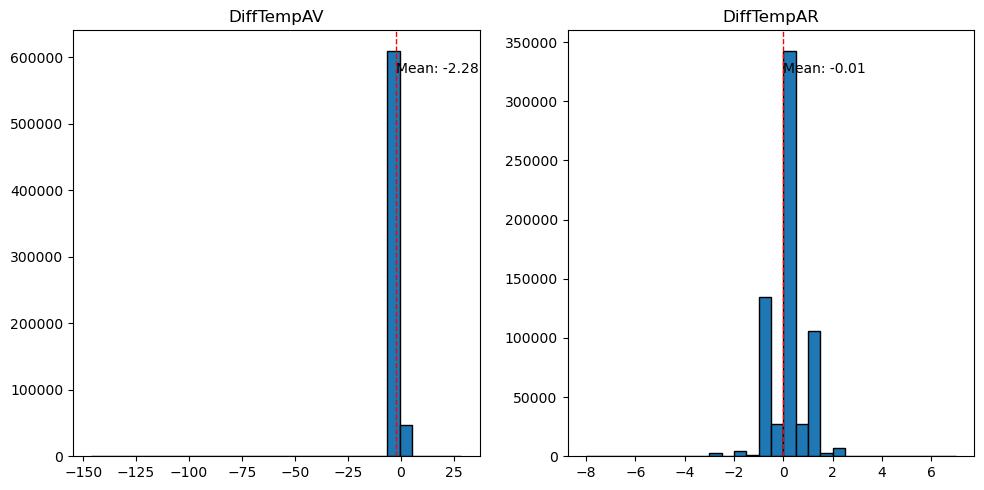

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1) # first subplot
plt.hist(df['DiffTempAV'].dropna(), bins=30, edgecolor='black')
plt.axvline(df['DiffTempAV'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('DiffTempAV')
min_ylim, max_ylim = plt.ylim()
plt.text(df['DiffTempAV'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['DiffTempAV'].mean()))

plt.subplot(1, 2, 2) # second subplot
plt.hist(df['DiffTempAR'].dropna(), bins=30, edgecolor='black')
plt.axvline(df['DiffTempAR'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('DiffTempAR')
min_ylim, max_ylim = plt.ylim()
plt.text(df['DiffTempAR'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['DiffTempAR'].mean()))

plt.tight_layout()
plt.show()



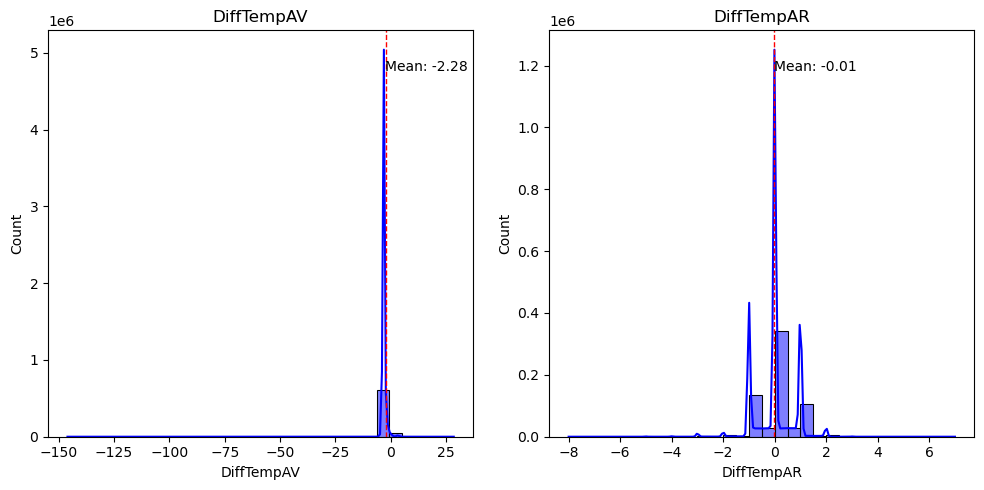

In [103]:
import seaborn as sns

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1) 
sns.histplot(df['DiffTempAV'].dropna(), kde=True, color='blue', bins=30)
plt.axvline(df['DiffTempAV'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('DiffTempAV')
min_ylim, max_ylim = plt.ylim()
plt.text(df['DiffTempAV'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['DiffTempAV'].mean()))

plt.subplot(1, 2, 2) 
sns.histplot(df['DiffTempAR'].dropna(), kde=True, color='blue', bins=30)
plt.axvline(df['DiffTempAR'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('DiffTempAR')
min_ylim, max_ylim = plt.ylim()
plt.text(df['DiffTempAR'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['DiffTempAR'].mean()))

plt.tight_layout()
plt.show()


In [104]:
print(df['DiffTempAV'].describe())
print(df['DiffTempAR'].describe())


count    657801.000000
mean         -2.277171
std           1.228224
min        -146.075613
25%          -3.000000
50%          -2.753251
75%          -2.000000
max          28.513008
Name: DiffTempAV, dtype: float64
count    657801.000000
mean         -0.007313
std           0.735108
min          -8.000000
25%          -0.134544
50%           0.000000
75%           0.108104
max           7.000000
Name: DiffTempAR, dtype: float64


In [105]:
print(df['DiffTempAR'].value_counts().nlargest(10))

 0.0    315634
-1.0    107393
 1.0    103233
 2.0      7050
-2.0      3466
-3.0      2667
-4.0       340
-5.0       199
 3.0       197
 4.0        70
Name: DiffTempAR, dtype: int64


In [106]:
from scipy.stats import gaussian_kde

data = df['DiffTempAR'].dropna()
kde = gaussian_kde(data)
print(kde)

In [107]:
import numpy as np
from scipy.signal import argrelextrema

x_values = np.linspace(data.min(), data.max(), num=1000)
y_values = kde.evaluate(x_values)

# argrelextrema returns the indices of the local maxima
maxima_indices = argrelextrema(y_values, np.greater)

peak_values = x_values[maxima_indices]


In [108]:
print(peak_values)


[-7.45945946e+00 -6.99399399e+00 -6.78378378e+00 -6.61861862e+00
 -6.34834835e+00 -6.00300300e+00 -5.58258258e+00 -4.99699700e+00
 -4.66666667e+00 -4.53153153e+00 -4.24624625e+00 -4.00600601e+00
 -3.63063063e+00 -3.37537538e+00 -3.00000000e+00 -2.30930931e+00
 -1.99399399e+00 -1.45345345e+00 -1.00300300e+00 -5.67567568e-01
  3.00300300e-03  4.38438438e-01  6.03603604e-01  9.93993994e-01
  1.36936937e+00  1.69969970e+00  2.00000000e+00  2.40540541e+00
  2.61561562e+00  3.00600601e+00  3.33633634e+00  3.45645646e+00
  3.60660661e+00  3.74174174e+00  3.99699700e+00  4.58258258e+00
  4.85285285e+00  5.00300300e+00  5.40840841e+00  5.63363363e+00
  5.79879880e+00  6.00900901e+00  6.98498498e+00]


In [109]:
peak_df = pd.DataFrame({
    'PeakValue': peak_values,
    'Density': y_values[maxima_indices]
})

print(peak_df)


    PeakValue   Density
0   -7.459459  0.000021
1   -6.993994  0.000203
2   -6.783784  0.000012
3   -6.618619  0.000012
4   -6.348348  0.000012
5   -6.003003  0.000200
6   -5.582583  0.000012
7   -4.996997  0.002443
8   -4.666667  0.000069
9   -4.531532  0.000094
10  -4.246246  0.000104
11  -4.006006  0.004140
12  -3.630631  0.000321
13  -3.375375  0.000269
14  -3.000000  0.032843
15  -2.309309  0.001199
16  -1.993994  0.044170
17  -1.453453  0.003543
18  -1.003003  1.331362
19  -0.567568  0.081704
20   0.003003  3.872236
21   0.438438  0.084540
22   0.603604  0.084146
23   0.993994  1.280983
24   1.369369  0.008486
25   1.699700  0.008204
26   2.000000  0.088509
27   2.405405  0.000106
28   2.615616  0.000136
29   3.006006  0.002409
30   3.336336  0.000073
31   3.456456  0.000080
32   3.606607  0.000092
33   3.741742  0.000052
34   3.996997  0.000855
35   4.582583  0.000028
36   4.852853  0.000013
37   5.003003  0.000060
38   5.408408  0.000012
39   5.633634  0.000012
40   5.798799  0

In [110]:
df['debit_Volumique'] = df['Epaisseur']*df['Largeur']*df['VitesseCentre']
df['Rapport_geomtrique'] = df['Epaisseur']/df['Largeur']
df['Rapport_Speed'] = df['Epaisseur']/df['VitesseCentre']

In [111]:
df.columns

Index(['DateConsommation', 'Produit', 'Fournisseur', 'Nuance', 'CodeAcier',
       'CoilId', 'BobineId', 'BobinePhysId', 'Xpos', 'Absorptivite',
       'Epaisseur', 'Largeur', 'ConsigneTemperatureLunetteCoin',
       'CorrectionNuanceAppliquee', 'TemperatureLunCoin',
       'ConsigneTemperatureBainAvant', 'ConsigneTemperatureBainArriere',
       'TemperatureBainAV', 'TemperatureBainAR', 'TemperatureBainAlu',
       'TendanceBain', 'THR', 'VitesseCentre', 'DiffTempAV', 'DiffTempAR',
       'CorrectionNuance', 'debit_Volumique', 'Rapport_geomtrique',
       'Rapport_Speed'],
      dtype='object')

In [112]:

from scipy.stats import zscore


selected_columns = [ 'Epaisseur', 'Largeur', 'debit_Volumique', 
                    'VitesseCentre','Rapport_geomtrique','Rapport_Speed', 'DiffTempAR']
df_selected = df[selected_columns]

df_normalized = df_selected.apply(zscore)

correlation_matrix = df_normalized.corr()

print(correlation_matrix)


                    Epaisseur   Largeur  debit_Volumique  VitesseCentre  \
Epaisseur            1.000000  0.337848         0.535523      -0.891579   
Largeur              0.337848  1.000000         0.902221      -0.493497   
debit_Volumique      0.535523  0.902221         1.000000      -0.532670   
VitesseCentre       -0.891579 -0.493497        -0.532670       1.000000   
Rapport_geomtrique   0.705984 -0.406448        -0.140387      -0.492656   
Rapport_Speed        0.969648  0.346261         0.466756      -0.888100   
DiffTempAR          -0.199175 -0.161448        -0.237077       0.141115   

                    Rapport_geomtrique  Rapport_Speed  DiffTempAR  
Epaisseur                     0.705984       0.969648   -0.199175  
Largeur                      -0.406448       0.346261   -0.161448  
debit_Volumique              -0.140387       0.466756   -0.237077  
VitesseCentre                -0.492656      -0.888100    0.141115  
Rapport_geomtrique            1.000000       0.655420   -0.

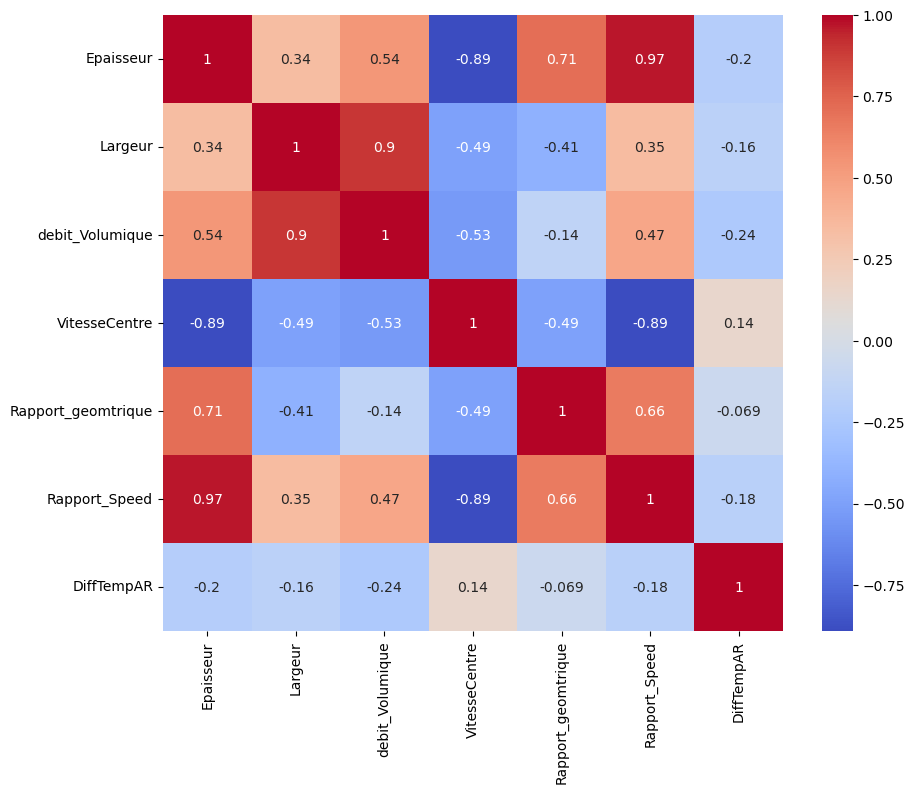

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [114]:
df.set_index('DateConsommation', inplace=True)


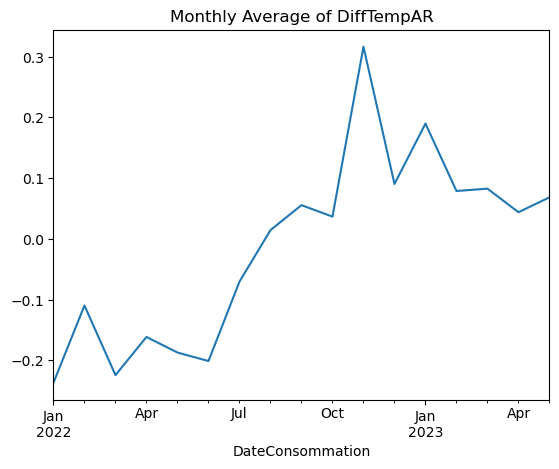

In [115]:
# assuming df is your DataFrame
df['DiffTempAR'].resample('M').mean().plot()
plt.title('Monthly Average of DiffTempAR')
plt.show()


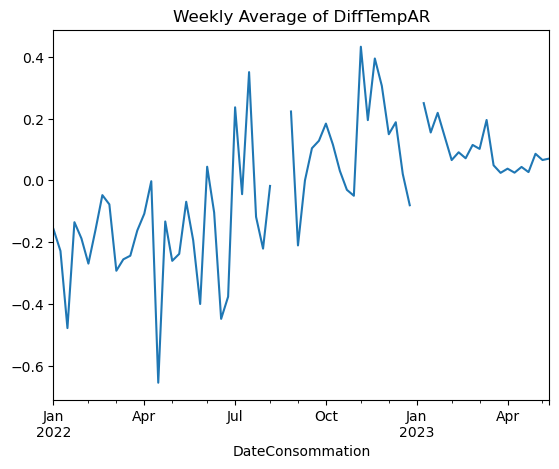

In [116]:
df['DiffTempAR'].resample('W').mean().plot()
plt.title('Weekly Average of DiffTempAR')
plt.show()

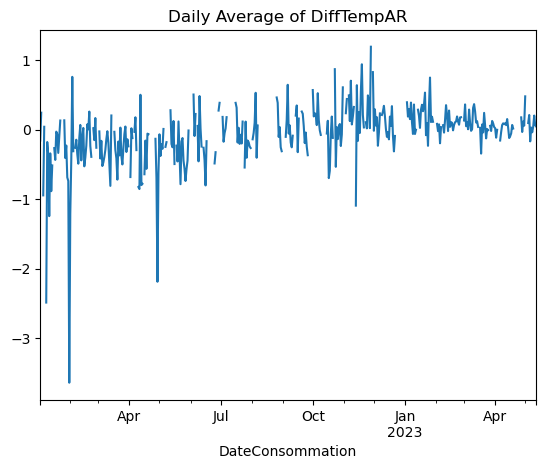

In [117]:
df['DiffTempAR'].resample('D').mean().plot()
plt.title('Daily Average of DiffTempAR')
plt.show()

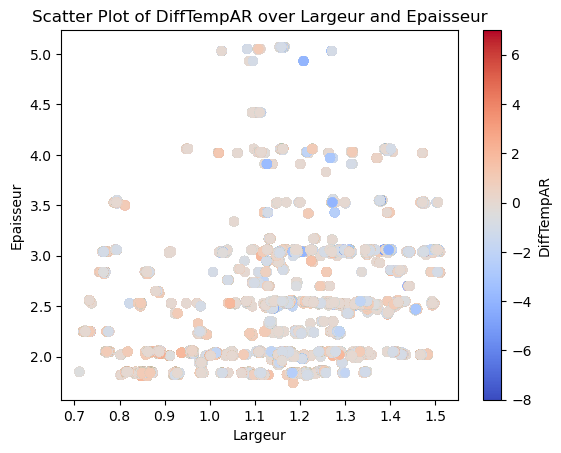

In [118]:
import matplotlib.pyplot as plt

plt.scatter(df['Largeur'], df['Epaisseur'], c=df['DiffTempAR'], cmap='coolwarm')
plt.colorbar(label='DiffTempAR')
plt.xlabel('Largeur')
plt.ylabel('Epaisseur')
plt.title('Scatter Plot of DiffTempAR over Largeur and Epaisseur')
plt.show()


c:\Users\elmehdi.berchid\AppData\Local\anaconda3\envs\DS_stage\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


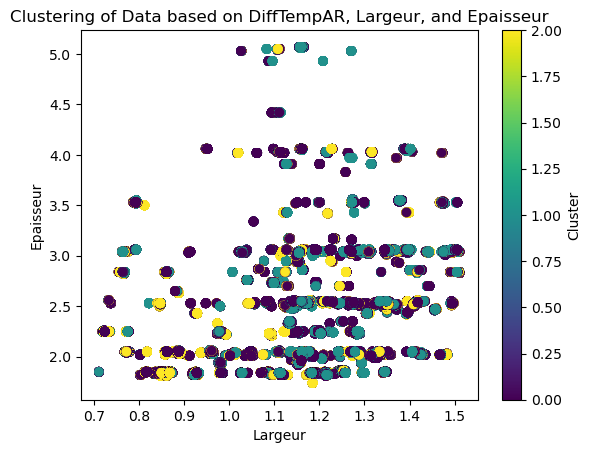

In [119]:
from sklearn.cluster import KMeans

# Select the columns of interest for clustering
X = df[['DiffTempAR', 'Largeur', 'Epaisseur']]

# Specify the number of clusters
n_clusters = 3

# Create and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X[['DiffTempAR']])

# Assign cluster labels to each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Plot the clusters
plt.scatter(df['Largeur'], df['Epaisseur'], c=df['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Largeur')
plt.ylabel('Epaisseur')
plt.title('Clustering of Data based on DiffTempAR, Largeur, and Epaisseur')
plt.show()


In [120]:
df.reset_index(inplace=True)

In [121]:
#segmentation : 
df1 = df[df['DiffTempAR'] < -1]
df2 = df[(df['DiffTempAR'] >= -1) & (df['DiffTempAR'] <= 1)]
df3 = df[df['DiffTempAR'] > 1]


**Exploratory Data Analysis (EDA) for each segment:**

In [122]:
df1.set_index('DateConsommation', inplace=True)
df2.set_index('DateConsommation', inplace=True)
df3.set_index('DateConsommation', inplace=True)
